# Financial Machine Learning II (Practical)

## Author: Adamantios Ntakaris

### Week 1 - Seminar 1

##### Business School - University of Edinburgh 



In [2]:
# Install hdf5 library by interacting with the interpreter 
import sys
!{sys.executable} -m pip install hdf5storage
!{sys.executable} -m pip install tensorflow

# Import Libraries 
import hdf5storage
import pandas as pd
import keras
import tensorflow as tf

  Using cached hdf5storage-0.1.18-py2.py3-none-any.whl (53 kB)
  Using cached tensorflow-2.8.0-cp39-cp39-manylinux2010_x86_64.whl (497.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached wrapt-1.13.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (81 kB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.1 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.44.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached libclang-

2022-02-20 00:01:30.606227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-20 00:01:30.606280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 1. Read Data

In [3]:
LOB_input = hdf5storage.loadmat('S092215-v50-AMZN_OCT2_states.mat')
LOB_Amazon = pd.DataFrame.from_dict(LOB_input['LOB'])

In [4]:
# This is a problematic representation of the data. Why?
LOB_Amazon.head()

0        1      2        3    4        5    6        7    8   \
0  1442894410000        0      0        0    0  5427400  100        0    0   
1  1442894410000  5452100  49400  5476800  100  5427400  100        0    0   
2  1442894410073  5451900  49000  5476400  100  5427400  100  5476800  100   
3  1442894410073  5452000  48800  5476400  100  5427600  100  5476800  100   
4  1442894410073  5452000  48800  5476400  100  5427600  100  5476800  100   

        9   ...  33  34  35  36  37  38  39  40  41  42  
0        0  ...   0   0   0   0   0   0   0   0   0   0  
1        0  ...   0   0   0   0   0   0   0   0   0   0  
2        0  ...   0   0   0   0   0   0   0   0   0   0  
3  5427400  ...   0   0   0   0   0   0   0   0   0   0  
4        0  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 43 columns]

In [5]:
# Add Column Titles
LOB_Amazon.columns = [
                      "Time", "Mid_Price", "Spread", 
                      "AskPrice1", "AskVolume1","BidPrice1", "BidVolume1", # Level 1
                      "AskPrice2", "AskVolume2","BidPrice2", "BidVolume2", # Level 2
                      "AskPrice3", "AskVolume3","BidPrice3", "BidVolume3", # Level 3
                      "AskPrice4", "AskVolume4","BidPrice4", "BidVolume4", # Level 4
                      "AskPrice5", "AskVolume5","BidPrice5", "BidVolume5", # Level 5
                      "AskPrice6", "AskVolume6","BidPrice6", "BidVolume6", # Level 6
                      "AskPrice7", "AskVolume7","BidPrice7", "BidVolume7", # Level 7
                      "AskPrice8", "AskVolume8","BidPrice8", "BidVolume8", # Level 8
                      "AskPrice9", "AskVolume9","BidPrice9", "BidVolume9", # Level 9
                      "AskPrice10", "AskVolume10","BidPrice10", "BidVolume10", # Level 10
                     ]

In [6]:
# Much better Now?
LOB_Amazon.head()

Time  Mid_Price  Spread  AskPrice1  AskVolume1  BidPrice1  \
0  1442894410000          0       0          0           0    5427400   
1  1442894410000    5452100   49400    5476800         100    5427400   
2  1442894410073    5451900   49000    5476400         100    5427400   
3  1442894410073    5452000   48800    5476400         100    5427600   
4  1442894410073    5452000   48800    5476400         100    5427600   

   BidVolume1  AskPrice2  AskVolume2  BidPrice2  ...  BidPrice8  BidVolume8  \
0         100          0           0          0  ...          0           0   
1         100          0           0          0  ...          0           0   
2         100    5476800         100          0  ...          0           0   
3         100    5476800         100    5427400  ...          0           0   
4         100    5476800         100          0  ...          0           0   

   AskPrice9  AskVolume9  BidPrice9  BidVolume9  AskPrice10  AskVolume10  \
0          0           0          0           0           0            0   
1          0           0          0           0           0            0   
2          0           0          0           0           0            0   
3          0           0          0           0           0            0   
4          0           0          0           0           0            0   

   BidPrice10  BidVolume10  
0           0            0  
1           0            0  
2           0            0  
3           0            0  
4           0            0  

[5 rows x 43 columns]

# 2. Convert epoch time to readable format


In [7]:
# Conversion module
import datetime
    
# Version 1.0
new_time_column = []
for item in LOB_Amazon["Time"]:
    current_row = datetime.datetime.fromtimestamp(item/1000.0) #1000.0 since 1 sec = 1000 mls
    new_time_column.append(current_row)

# Version 2.0
readable_time = []
for i in range(0,len(new_time_column)):
    current_time = new_time_column[i].strftime("%H:%M:%f")
    readable_time.append(current_time)   

In [8]:
# Replace Unix time with the Readable Time Format (=Version 2.0)
LOB_Amazon['Time'] = readable_time 

In [9]:
# How it looks now?
LOB_Amazon.head(10)

Time  Mid_Price  Spread  AskPrice1  AskVolume1  BidPrice1  \
0  04:00:000000          0       0          0           0    5427400   
1  04:00:000000    5452100   49400    5476800         100    5427400   
2  04:00:073000    5451900   49000    5476400         100    5427400   
3  04:00:073000    5452000   48800    5476400         100    5427600   
4  04:00:073000    5452000   48800    5476400         100    5427600   
5  04:00:073000    5452000   48800    5476400         100    5427600   
6  04:00:073000    5452000   48800    5476400         100    5427600   
7  04:00:146000    5451900   48600    5476200         100    5427600   
8  04:00:146000    5451900   48600    5476200         100    5427600   
9  04:00:395000    5455800   56400    5484000         100    5427600   

   BidVolume1  AskPrice2  AskVolume2  BidPrice2  ...  BidPrice8  BidVolume8  \
0         100          0           0          0  ...          0           0   
1         100          0           0          0  ...          0           0   
2         100    5476800         100          0  ...          0           0   
3         100    5476800         100    5427400  ...          0           0   
4         100    5476800         100          0  ...          0           0   
5         100          0           0          0  ...          0           0   
6         100    5484000         100          0  ...          0           0   
7         100    5476400         100          0  ...          0           0   
8         100    5484000         100          0  ...          0           0   
9         100          0           0          0  ...          0           0   

   AskPrice9  AskVolume9  BidPrice9  BidVolume9  AskPrice10  AskVolume10  \
0          0           0          0           0           0            0   
1          0           0          0           0           0            0   
2          0           0          0           0           0            0   
3          0           0          0           0           0            0   
4          0           0          0           0           0            0   
5          0           0          0           0           0            0   
6          0           0          0           0           0            0   
7          0           0          0           0           0            0   
8          0           0          0           0           0            0   
9          0           0          0           0           0            0   

   BidPrice10  BidVolume10  
0           0            0  
1           0            0  
2           0            0  
3           0            0  
4           0            0  
5           0            0  
6           0            0  
7           0            0  
8           0            0  
9           0            0  

[10 rows x 43 columns]

# 3. Plot Time Series

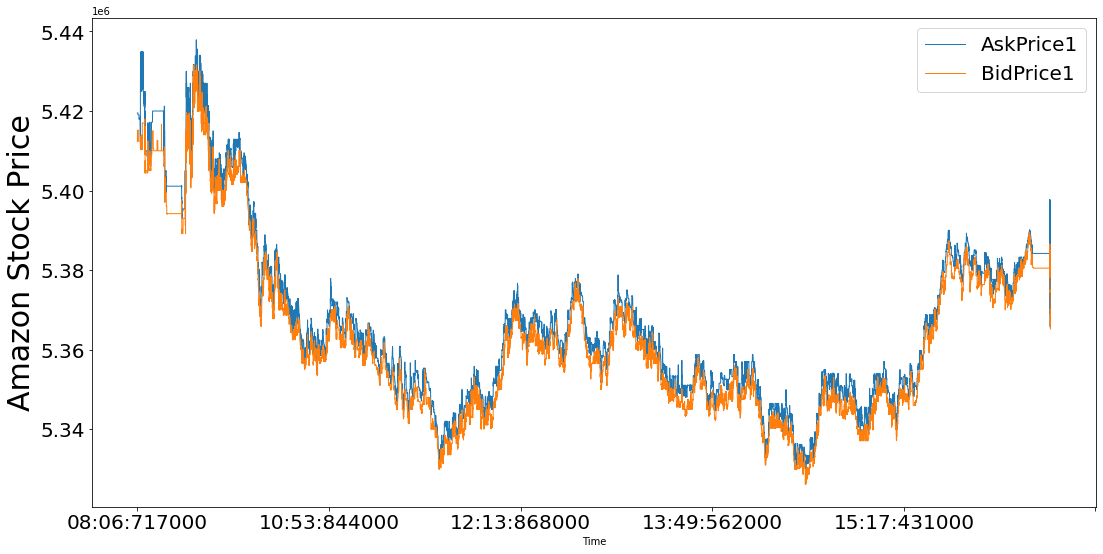

In [10]:
#Plot Best Ask and Bid Prices
import matplotlib.pyplot as plt

LOB_Amazon_Sample = LOB_Amazon.iloc[86000:562500,] # Time-framing

LOB_Amazon_Sample.plot(x="Time", y=["AskPrice1", "BidPrice1"],
                       figsize=(18, 9), linewidth=1.0, fontsize=20)

plt.legend(loc=1, prop={'size': 20})
plt.rcParams.update({'font.size': 10})
plt.ylabel('Amazon Stock Price',fontsize=30);

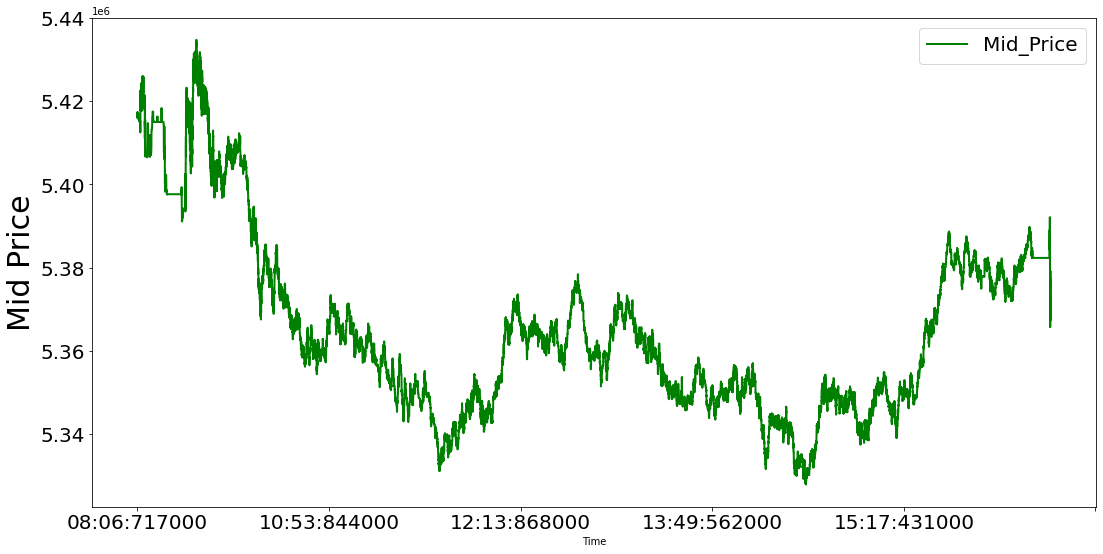

In [11]:
#Plot Mid-Price
LOB_Amazon_Sample.plot(x="Time", 
                       y=["Mid_Price"], figsize=(18, 9), linewidth=2.0, 
                       color = {"green"}, 
                       fontsize=20
                      )
plt.legend(loc=1, prop={'size': 20})
plt.rcParams.update({'font.size': 20})
plt.ylabel('Mid Price',fontsize=30)
plt.show()

# 4. Missing Values

In [12]:
# Let's work on a copy of the data
LOB_Amazon_copy = LOB_Amazon.copy()
size = len(LOB_Amazon_copy)


problems = LOB_Amazon_copy.isnull().any(axis=1)

# I consider variables with over 40% missing values unreliable, so let's delete them from the data
for col in LOB_Amazon_copy.columns:
    perc = LOB_Amazon_copy[col].isnull().sum() / float(size)
    if perc > 0.4:
        print('Deleting column {0}: missing perc={1:.2f}'.format(col, perc))    
        LOB_Amazon_copy = LOB_Amazon_copy.drop([col], axis=1)
        if col in LOB_Amazon_copy.columns: 
            LOB_Amazon_copy.columns.remove(col)
            
problems = LOB_Amazon_copy.isnull().any(axis=1)

In [13]:
print("All rows: ", size)
print("Rows with missing values: {0}".format(problems.sum()))

All rows:  562650
Rows with missing values: 0


# 5. Feature Engineering

In [14]:
# Lagged Features
LOB_Amazon['Ask_lag_1'] = LOB_Amazon['AskPrice1'].shift(1)
LOB_Amazon['Bid_lag_1'] = LOB_Amazon['BidPrice1'].shift(1)

In [15]:
# Rolling Window
LOB_Amazon['rolling_mean'] = LOB_Amazon['AskPrice1'].rolling(window=4).mean()

In [16]:
LOB_Amazon.head()

Time  Mid_Price  Spread  AskPrice1  AskVolume1  BidPrice1  \
0  04:00:000000          0       0          0           0    5427400   
1  04:00:000000    5452100   49400    5476800         100    5427400   
2  04:00:073000    5451900   49000    5476400         100    5427400   
3  04:00:073000    5452000   48800    5476400         100    5427600   
4  04:00:073000    5452000   48800    5476400         100    5427600   

   BidVolume1  AskPrice2  AskVolume2  BidPrice2  ...  AskVolume9  BidPrice9  \
0         100          0           0          0  ...           0          0   
1         100          0           0          0  ...           0          0   
2         100    5476800         100          0  ...           0          0   
3         100    5476800         100    5427400  ...           0          0   
4         100    5476800         100          0  ...           0          0   

   BidVolume9  AskPrice10  AskVolume10  BidPrice10  BidVolume10  Ask_lag_1  \
0           0           0            0           0            0        NaN   
1           0           0            0           0            0        0.0   
2           0           0            0           0            0  5476800.0   
3           0           0            0           0            0  5476400.0   
4           0           0            0           0            0  5476400.0   

   Bid_lag_1  rolling_mean  
0        NaN           NaN  
1  5427400.0           NaN  
2  5427400.0           NaN  
3  5427400.0     4107400.0  
4  5427600.0     5476500.0  

[5 rows x 46 columns]

# 6. Prepare Train & Test sets

In [17]:
# Identify the Columns that will be utilized as Inputs
Feature_Matrix = LOB_Amazon_Sample.iloc[4:-1,3:] 
Mid_Price = LOB_Amazon_Sample.iloc[5::,1]

print('Feature_Matrix length:',len(Feature_Matrix))
print('Mid_Price_Series length:',len(Mid_Price))

# Why I did this iloc to Feature_Matrix?

Feature_Matrix length: 476495
Mid_Price_Series length: 476495


In [44]:
# Time Series K-Fold Cross Validation
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense  
from tensorflow.keras.optimizers import Adam



tscv = TimeSeriesSplit()
print(tscv)
print(62*'#')

counter = 0
for train_index, test_index in tscv.split(Feature_Matrix):
    counter += 1
    print('Fold %d:' %counter)
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    
    X_train, X_test = Feature_Matrix.iloc[train_index,:], Feature_Matrix.iloc[test_index,:]
    y_tr, y_te = Mid_Price.iloc[train_index], Mid_Price.iloc[test_index]
    print(62*'-')
    
    #---------------------------------------------------------------------------------------------#
    #---------------------------------------- Classifiers ----------------------------------------#
    #---------------------------------------------------------------------------------------------#

    ## ----------------------------------------------------------------------------------------- ##
    # Shallow MLP
    print('Shallow MLP')
    model_mlp = Sequential()
    model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
    model_mlp.add(Dense(1))
    model_mlp.compile(loss='mse', optimizer='adam', metrics=['mse'])
    #model_mlp.summary()
    history = model_mlp.fit(X_train, y_tr, epochs=5, batch_size=10000)
    print(50*'-')
    print('')
    # Deep MLP
    print('Deep MLP')
    model_mlp = Sequential()
    model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
    model_mlp.add(Dense(32, activation='relu'))
    model_mlp.add(Dense(1))
    model_mlp.compile(loss='mse', optimizer='adam', metrics=['mse'])
    #model_mlp.summary()
    history = model_mlp.fit(X_train, y_tr, epochs=5, batch_size=10000)
    print('')
    # Deep MLP
    print('Very Deep MLP')
    model_mlp = Sequential()
    model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
    model_mlp.add(Dense(100, activation='relu'))
    model_mlp.add(Dense(100, activation='relu'))
    model_mlp.add(Dense(32, activation='relu'))
    model_mlp.add(Dense(1))
    model_mlp.compile(loss='mse', optimizer='adam', metrics=['mse'])
    #model_mlp.summary()
    history = model_mlp.fit(X_train, y_tr, epochs=10, batch_size=100000)
    print(62*'#')

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
##############################################################
Fold 1:
TRAIN: 79420 TEST: 79415
--------------------------------------------------------------
Shallow MLP
Epoch 1/5
8/8 [==============================] - 1s 17ms/step - loss: 2597089705984.0000 - mse: 2597089705984.0000
Epoch 2/5
8/8 [==============================] - 0s 17ms/step - loss: 922964328448.0000 - mse: 922964328448.0000
Epoch 3/5
8/8 [==============================] - 0s 26ms/step - loss: 415207325696.0000 - mse: 415207325696.0000
Epoch 4/5
8/8 [==============================] - 0s 26ms/step - loss: 100480942080.0000 - mse: 100480942080.0000
Epoch 5/5
8/8 [==============================] - 0s 16ms/step - loss: 54479749120.0000 - mse: 54479749120.0000
--------------------------------------------------

Deep MLP
Epoch 1/5
8/8 [==============================] - 1s 29ms/step - loss: 19724033327104.0000 - mse: 19724033327104.0000
Epoch 2/5
8/8 

KeyboardInterrupt: 